In [2]:
#Libraries
import pandas as pd
import numpy as np
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import log

In [3]:
df = pd.read_csv(r'C:/Users/Jordan/Desktop/jupyter notebook/Dissertation Code/data_cleaned_and_Explored.csv')
df.head()

,Unnamed: 0,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype,c_o
0,0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0,6.887553
1,1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601
2,2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0,7.005789
3,3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0,6.887553
4,4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601


In [4]:
df = df.drop(columns = {'manufacturer', 'model', 'description', 'extra_urban_metric', 'c_o'})

In [4]:
df['fuel_12k_miles'] = df['fuel_12k_miles'].apply(lambda x: '0-25%' if 0<=x<=1142 else
                                                  '25-50%' if 1143<=x<=1376 else
                                                  '50-75%' if 1377<=x<=1680 else '75-100%')

df['co'] = df['co'].apply(lambda x: '0-25%' if 0<=x<=189 else
                          '25-50%' if 190<=x<=302 else
                          '50-75%' if 303<=x<=380 else '75-100%')

df['co2'] = df['co2'].apply(lambda x: '0-25%' if 0<=x<=150 else
                            '25-50%' if 151<=x<=180 else
                            '50-75%' if 181<x<218 else '75-100%')

df['engine_capacity'] = df['engine_capacity'].apply(lambda x: 'Low' if 0<=x<=1400 else
                                                    'Medium' if 1500<=x<=2400 else 'High')

df['urban_metric'] = df['urban_metric'].apply(lambda x: '0-25%' if 0<=x<=7.7 else
                                             '25-50%' if 7.8<=x<=9.8 else
                                             '50-75%' if 9.9<=x<=12.4 else '75-100%')


In [12]:
df['co']



0         981
1        1106
2        1104
3         981
4        1106
         ... 
44674     345
44675     220
44676     302
44677     284
44678     284
Name: co, Length: 44679, dtype: int64

In [11]:
df['co'] = df['co'] + 1

In [5]:
df.head()

,year,euro_standard,engine_capacity,urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,2000,2,Medium,50-75%,50-75%,75-100%,25-50%,0,0
1,2000,2,Medium,50-75%,50-75%,75-100%,25-50%,0,0
2,2000,2,Medium,50-75%,50-75%,75-100%,25-50%,0,0
3,2000,2,Medium,50-75%,50-75%,75-100%,25-50%,0,0
4,2000,2,Medium,50-75%,50-75%,75-100%,25-50%,0,0


In [6]:
dfhot, dfnum = bn.df2onehot(df)

 11%|█████████▎                                                                          | 1/9 [00:00<00:01,  7.80it/s]


[df2onehot] >Auto detecting dtypes.


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:00<00:00, 57.88it/s]

[df2onehot] >Set dtypes in dataframe..


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 60.08it/s]

[df2onehot] >Total onehot features: 45


Building tree: 100%|███████████████████████████████████████████████████████████████| 36/36.0 [00:00<00:00, 1512.13it/s]


[bnlearn] >Computing best DAG using [cl]
[bnlearn] >Plot based on BayesianModel


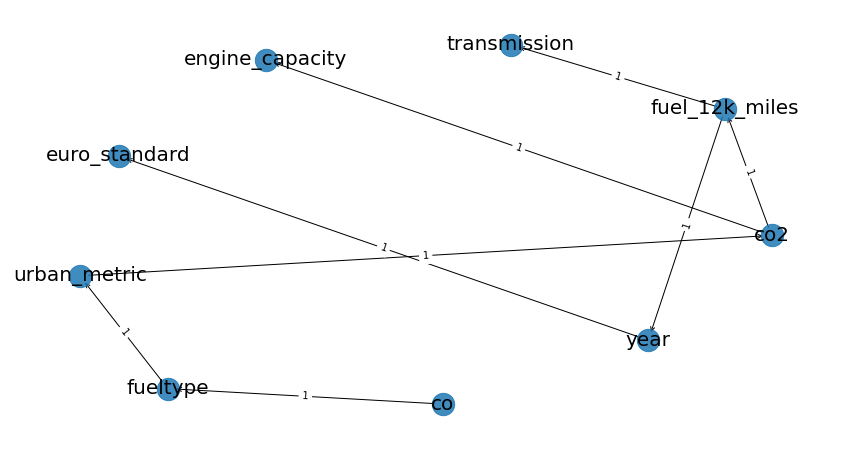

In [7]:
DAG = bn.structure_learning.fit(dfnum, methodtype='cl', root_node='co')
# Plot
G = bn.plot(DAG)

In [8]:
model = bn.parameter_learning.fit(DAG, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of co:
+-------+----------+
| co(1) | 0.251253 |
+-------+----------+
| co(2) | 0.249042 |
+-------+----------+
| co(3) | 0.128177 |
+-------+----------+
| co(4) | 0.371527 |
+-------+----------+
[bnlearn] >CPD of fueltype:
+-------------+----------------------+-----------------------+----------------------+----------------------+
| co          | co(1)                | co(2)                 | co(3)                | co(4)                |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(1) | 0.21146641108303563  | 0.5190752461322081    | 0.6777113578138343   | 0.9000648164515939   |
+-------------+----------------------+-----------------------+----------------------+----------------------+
| fueltype(2) | 0.7682321164067265   | 0.459915611814346     | 0.2959863364645602   | 0.088386070355

In [9]:
query = bn.inference.fit(model, variables=['Engine Capacity'], evidence={'co': True})
print(query)
print(query.df)

Exception: [bnlearn] >Error: [variables] should match names in the model (Case sensitive!)

In [ ]:
q1 = bn.inference.fit(model, variables=['transmission'], evidence={'year':14})
print(query)
print(query.df)

In [ ]:
bn.print_CPD(model)

In [ ]:
Xtest = bn.sampling(model, n=1000)
Xtest = Xtest[['co2', 'urban_metric', 'engine_capacity']]
print(Xtest)

In [ ]:
Pred = bn.predict(model, Xtest, variables=['co2', 'urban_metric'])
print(Pred)

In [ ]:
MSE = metrics.mean_squared_error(Xtest, Pred)*100
print(MSE)

In [ ]:
n = len(Xtest)

In [ ]:
bic =  n * log(MSE) + 2 * log(n)    #2 is number of params of X 
bic